In [36]:
import time
import zhinst.core
import numpy as np
from matplotlib import pyplot as plt

import pyvisa
rm = pyvisa.ResourceManager()
hmp=rm.open_resource('ASRL4::INSTR')

device_id = "dev712"     # ex: 'dev1234'

server_host = "localhost"
server_port = 8005        # 8004 = HF2 / 8005 = MF / 8006 = UHF
api_level = 1

In [37]:
from scipy.ndimage import gaussian_filter1d as gf

In [38]:
# =========================
# Connexion au Zurich
# =========================
daq = zhinst.core.ziDAQServer(server_host, server_port, api_level)
channel = 1
sample_path = f"/{device_id}/demods/{channel}/sample"

# Vérifie la connexion au device
c = daq.connectDevice(device_id, "1gbe")
print(c or "OK")


OK


In [39]:
print('Connected to',hmp.query('*IDN?'))

Connected to ROHDE&SCHWARZ,HMP4030,101129,HW50020003/SW2.72



In [84]:
hmp.write(f'SOUR:CURR {current[0]}')
hmp.write(f'SOUR:VOLT 20')

14

In [101]:
allx=[]

In [99]:
# =========================
# Acquisition point par point point
# =========================
Npts=2001
current = np.arange(6.0,7.4,1e-3)
Npts=len(current)
x = np.zeros(Npts)
hmp.write(f'SOUR:CURR {current[0]}')
time.sleep(2)
for i in range(Npts):
    hmp.write(f'SOUR:CURR {current[i]}')
    time.sleep(0.1)
    data = daq.getSample(sample_path)
    x[i] = data['x'][0]
allx.append(x)

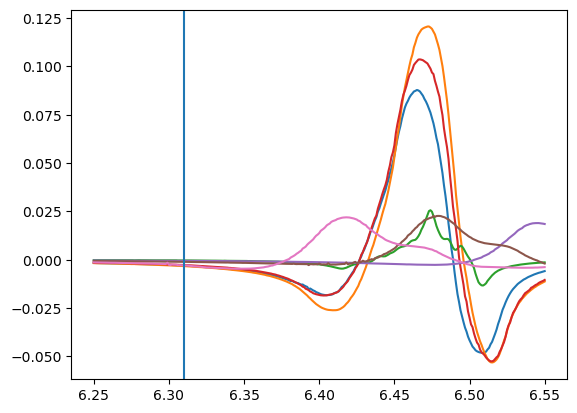

In [100]:
plt.plot(current,np.array(allx).T)
plt.axvline(6.310)

In [110]:
allx=[]

In [ ]:
# =========================
# Acquisition point par point point
# =========================
Npts=2001
current = np.arange(6.,7.0,1e-3)
Npts=len(current)
x = np.zeros(Npts)
hmp.write(f'SOUR:CURR {current[0]}')
time.sleep(2)
for i in range(Npts):
    hmp.write(f'SOUR:CURR {current[i]}')
    time.sleep(0.1)
    data = daq.getSample(sample_path)
    x[i] = data['x'][0]
allx.append(x)

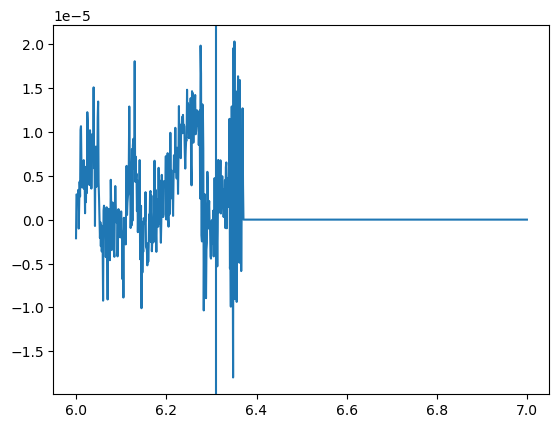

In [113]:
plt.plot(current,gf(x,1))
plt.axvline(6.310)

In [94]:
0.05/6.3*7551/2.8

21.4030612244898

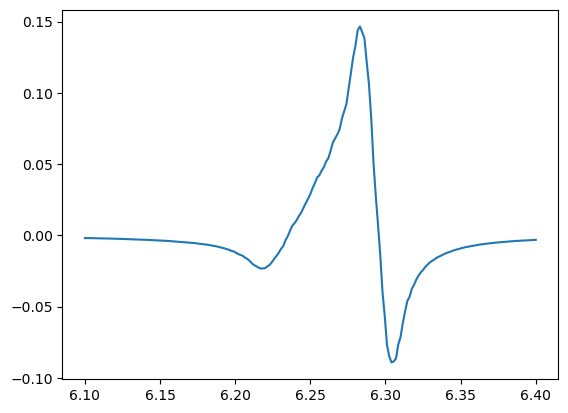

In [45]:
plt.plot(current,x)

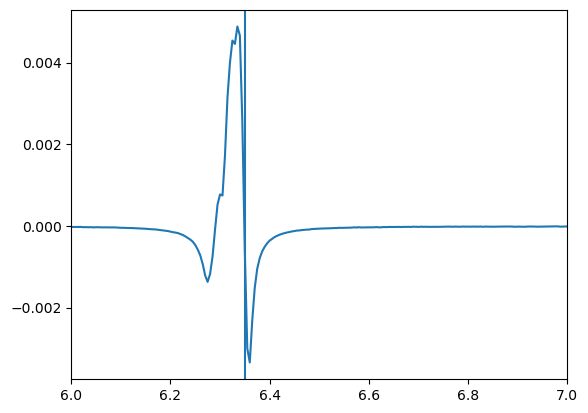

In [28]:
plt.plot(current,x)
plt.xlim(6,7)
plt.axvline(6.35)

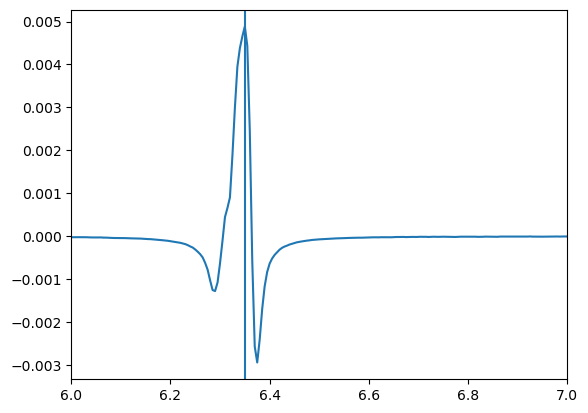

In [26]:
plt.plot(current,x)
plt.xlim(6,7)
plt.axvline(6.35)

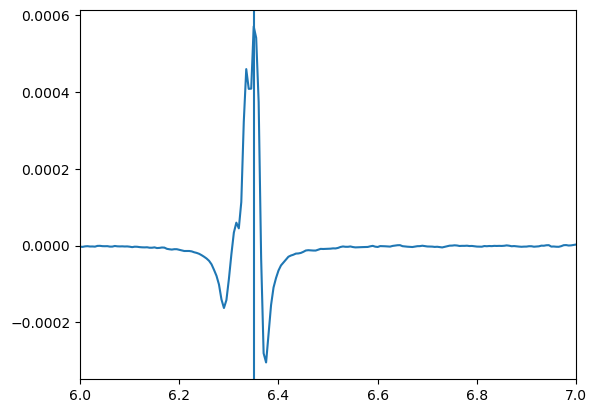

In [24]:
plt.plot(current,x)
plt.xlim(6,7)
plt.axvline(6.35)

(6.0, 7.0)

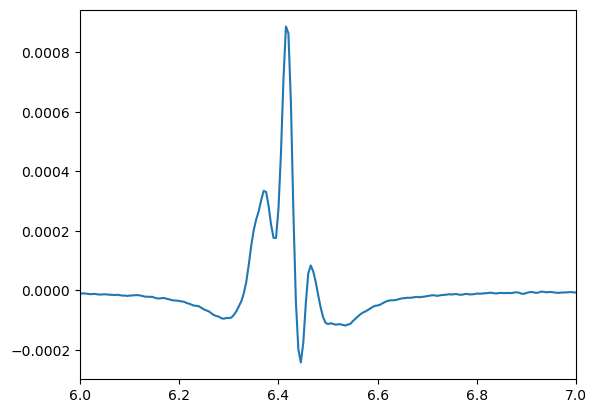

In [19]:
plt.plot(current,x)
plt.xlim(6,7)

In [70]:
hmp.write(f'SOUR:VOLT {voltage[0]}')
hmp.write(f'SOUR:CURR 10')

14

In [71]:
# =========================
# Acquisition point par point point
# =========================
Npts=2001
voltage = np.arange(7.3,7.6,1e-3)
Npts=len(voltage)
x=np.zeros(Npts)
hmp.write(f'SOUR:VOLT {voltage[0]}')
for i in range(Npts):
    hmp.write(f'SOUR:VOLT {voltage[i]}')
    time.sleep(0.5)
    data = daq.getSample(sample_path)
    x[i] = data['x'][0]


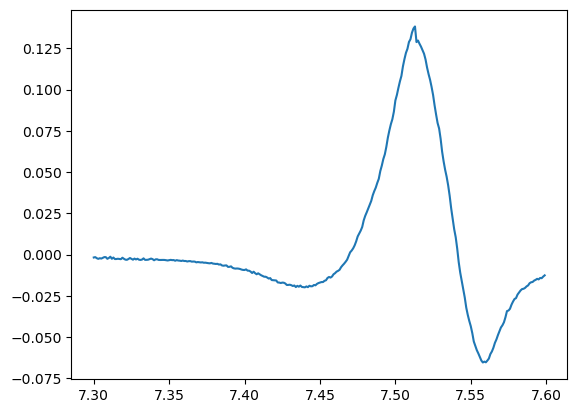

In [72]:
plt.plot(voltage,x)